![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_stock_market.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Demo  Stock Market Sentiment Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>


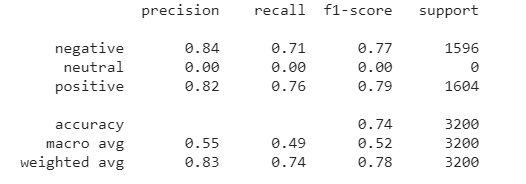




You can achieve these results or even better on this dataset with test  data:


<br>

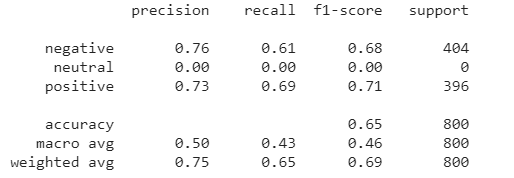


# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 68kB/s 
     |████████████████████████████████| 204kB 20.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=7f0edfd295bb5c8ac57fdffbd78fc64f6f9b0a9bcf4d81f4960d6bd0ed20fc26
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Stock Market  Sentiment dataset 
https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
#Context

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative and positive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv


--2021-02-25 08:40:04--  http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 758217 (740K) [text/csv]
Saving to: ‘stock_data.csv’

stock_data.csv      100%[===================>] 740.45K   461KB/s    in 1.6s    

2021-02-25 08:40:06 (461 KB/s) - ‘stock_data.csv’ saved [758217/758217]



In [ ]:
import pandas as pd
train_path = '/content/stock_data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
303,DPS breaking out this am. looks good. earnings...,positive
2921,DDD SSY Stops honored. So be it. Now.... must...,negative
2497,user arge % owners on Morningstar rival positi...,negative
3827,FS obama speech tonight moving it on up in cha...,positive
3659,user: Fascinating email chain between user and...,positive
...,...,...
432,The key is not to panic here. AAP is in the d...,positive
1810,ES_F Hedges rotating into Junk stocks like Sol...,negative
569,WH gap filled,positive
1873,BCM I work in this industry. don't just look a...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        23
     neutral       0.00      0.00      0.00         0
    positive       0.69      1.00      0.82        27

    accuracy                           0.54        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.37      0.54      0.44        50



,y,text,default_name_embeddings,sentiment_confidence,document,sentiment
origin_index,,,,,,
0,positive,"AAP 950 lot bid in the Feb 580 call at 9.50, m...","[0.039819009602069855, -0.01317680161446333, -...",0.652981,"AAP 950 lot bid in the Feb 580 call at 9.50, m...",positive
1,negative,"user: ADBE continues to weaken, not following ...","[0.05989246815443039, 0.06275778263807297, -0....",0.630831,"user: ADBE continues to weaken, not following ...",positive
2,negative,pnra missed this one yest on the short side bu...,"[-0.0019929897971451283, -0.026955554261803627...",0.701571,pnra missed this one yest on the short side bu...,positive
3,negative,PPO: 2) GM estimates 20% Y/Y unit growth for v...,"[0.0499078631401062, -0.019602565094828606, -0...",0.577670,PPO: 2) GM estimates 20% Y/Y unit growth for v...,neutral
4,positive,BAC avrg positive2.positive27,"[0.03407237306237221, 0.0034944196231663227, -...",0.642415,BAC avrg positive2.positive27,positive
5,negative,"CMG While traveling through Kalamazoo, MI on F...","[0.017684495076537132, -0.03009415790438652, -...",0.567573,"CMG While traveling through Kalamazoo, MI on F...",neutral
6,positive,i dont have a tech friend in world that owns t...,"[0.05138593912124634, 0.05815130099654198, -0....",0.714708,i dont have a tech friend in world that owns t...,positive
7,positive,SWI was a beaut,"[0.04824110120534897, -0.05754169449210167, -0...",0.722410,SWI was a beaut,positive
8,positive,"Again, this mkt is FAT while AAP is down 2.5% ...","[0.050297632813453674, -0.0360858328640461, -0...",0.670725,"Again, this mkt is FAT while AAP is down 2.5% ...",positive


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("Bitcoin dropped by 50 percent!")

,default_name_embeddings,sentiment_confidence,document,sentiment
origin_index,,,,
0,"[0.06509938091039658, -0.057081300765275955, -...",0.687247,Bitcoin dropped by 50 percent!,positive


## 5.  Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.93      0.61      0.74        23
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.89      0.87        27

    accuracy                           0.76        50
   macro avg       0.60      0.50      0.54        50
weighted avg       0.89      0.76      0.81        50



,y,text,default_name_embeddings,sentiment_confidence,document,sentiment
origin_index,,,,,,
0,positive,"AAP 950 lot bid in the Feb 580 call at 9.50, m...","[0.039819009602069855, -0.01317680161446333, -...",0.612311,"AAP 950 lot bid in the Feb 580 call at 9.50, m...",negative
1,negative,"user: ADBE continues to weaken, not following ...","[0.05989246815443039, 0.06275778263807297, -0....",0.581842,"user: ADBE continues to weaken, not following ...",neutral
2,negative,pnra missed this one yest on the short side bu...,"[-0.0019929897971451283, -0.026955554261803627...",0.563239,pnra missed this one yest on the short side bu...,neutral
3,negative,PPO: 2) GM estimates 20% Y/Y unit growth for v...,"[0.0499078631401062, -0.019602565094828606, -0...",0.684193,PPO: 2) GM estimates 20% Y/Y unit growth for v...,negative
4,positive,BAC avrg positive2.positive27,"[0.03407237306237221, 0.0034944196231663227, -...",0.845220,BAC avrg positive2.positive27,positive
5,negative,"CMG While traveling through Kalamazoo, MI on F...","[0.017684495076537132, -0.03009415790438652, -...",0.664491,"CMG While traveling through Kalamazoo, MI on F...",negative
6,positive,i dont have a tech friend in world that owns t...,"[0.05138593912124634, 0.05815130099654198, -0....",0.857243,i dont have a tech friend in world that owns t...,positive
7,positive,SWI was a beaut,"[0.04824110120534897, -0.05754169449210167, -0...",0.951524,SWI was a beaut,positive
8,positive,"Again, this mkt is FAT while AAP is down 2.5% ...","[0.050297632813453674, -0.0360858328640461, -0...",0.582303,"Again, this mkt is FAT while AAP is down 2.5% ...",neutral


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.84      0.71      0.77      1596
     neutral       0.00      0.00      0.00         0
    positive       0.82      0.76      0.79      1604

    accuracy                           0.74      3200
   macro avg       0.55      0.49      0.52      3200
weighted avg       0.83      0.74      0.78      3200



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.76      0.61      0.68       404
     neutral       0.00      0.00      0.00         0
    positive       0.73      0.69      0.71       396

    accuracy                           0.65       800
   macro avg       0.50      0.43      0.46       800
weighted avg       0.75      0.65      0.69       800



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path="./models/classifier_dl_trained")

preds = hdd_pipe.predict('Bitcoin dropped by 50 percent!!')
preds

,en_embed_sentence_small_bert_L12_768_embeddings,sentiment,sentiment_confidence,document
origin_index,,,,
0,"[0.20597101747989655, 0.16840755939483643, 0.0...",negative,0.761807,Bitcoin dropped by 50 percent!!


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea